#  The 6th Project for Data Analyst Nano Degree (Communicating Data Findings)
## by (Yousef Adel)

#### My dataset for this project is From Kaggla  (https://www.kaggle.com/datasnaek/youtube-new)
#### This dataset meets the requirements as illustrated bello


#### Context
YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [2]:
df = pd.read_csv('USvideos2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40949 non-null  int64  
 1   video_id                40949 non-null  object 
 2   trending_date           40949 non-null  object 
 3   title                   40949 non-null  object 
 4   channel_title           40949 non-null  object 
 5   category_id             40949 non-null  int64  
 6   publish_time            40949 non-null  object 
 7   tags                    40949 non-null  object 
 8   views                   40949 non-null  int64  
 9   likes                   40949 non-null  int64  
 10  dislikes                40949 non-null  int64  
 11  comment_count           40949 non-null  int64  
 12  thumbnail_link          40949 non-null  object 
 13  comments_disabled       40949 non-null  bool   
 14  ratings_disabled        40949 non-null

## Dataset columns 
- video_id (object)
- trending_date (object)
- title (object)
- channel_title (object)
- category_id (int64)
- publish_time (object) (needs to be modified to timestamp)
- tags (int64)
- views (int64)
- likes (int64)
- dislikes (int64)
- comment_count (int64)
- thumbnail_link (object)
- comments_disabled (bool)
- ratings_disabled (bool)
- video_error_or_removed (bool)
- description (object)

Data requirements check:
- Include at least 600 observations (OK.)
- Include at least eight variables (OK.)
- Include at least one qualitative / categorical variable. (This can also be engineered / created.) (OK.)
- Include at least one numeric variable. (OK.)
- Tidiness (OK.)

### Features of interest in your dataset:
- Find the trends in Youtube watching categories 
- Find the trends in channels 
- Correlation between the numaric variables in the data set.

## Data Cleaning
#### Dropping the columns that are not necessary for the analysis 

In [3]:
df = df.drop(columns=['thumbnail_link', 'description', 'video_error_or_removed'])

In [4]:
### Checking for null values 
df.isnull().sum()

Unnamed: 0            0
video_id              0
trending_date         0
title                 0
channel_title         0
category_id           0
publish_time          0
tags                  0
views                 0
likes                 0
dislikes              0
comment_count         0
comments_disabled     0
ratings_disabled      0
category_name        57
likes_log             0
views_log             0
dislikes_log          0
comment_log           0
dtype: int64

##### Modifying the category_id turning numbers into category_name for each number according to this resource:
https://gist.github.com/dgp/1b24bf2961521bd75d6c

In [5]:
# Extracing the unique values
unique_values =  pd.unique(df['category_id'])
print(unique_values)

[22 24 23 28  1 25 17 10 15 27 26  2 19 20 29 43]


In [6]:
#conver category numbers to names
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

In [7]:
#test for new category_name column
print(df.category_name.value_counts())

Entertainment               9964
Music                       6472
How to and Style            4146
Comedy                      3457
People and Blogs            3210
News & Politics             2487
Science and Technology      2401
Film and Animation          2345
Sport                       2174
Education                   1656
Pets and Animals             920
Gaming                       817
Travel and Events            402
Cars and Vehicles            384
Non Profits and Activism      57
Name: category_name, dtype: int64


In [8]:
#create a clean copy for analysis
df_clean = df.copy()

In [9]:
#Fining log values for numareical columns
df_clean['likes_log'] = np.log(df_clean['likes'] + 1)
df_clean['views_log'] = np.log(df_clean['views'] + 1)
df_clean['dislikes_log'] = np.log(df_clean['dislikes'] + 1)
df_clean['comment_log'] = np.log(df_clean['comment_count'] + 1)

## Univariate Exploration


What is the distrubtion for numaric variables after computing log vaules 
- likes 
- dislikes
- views
- comment count

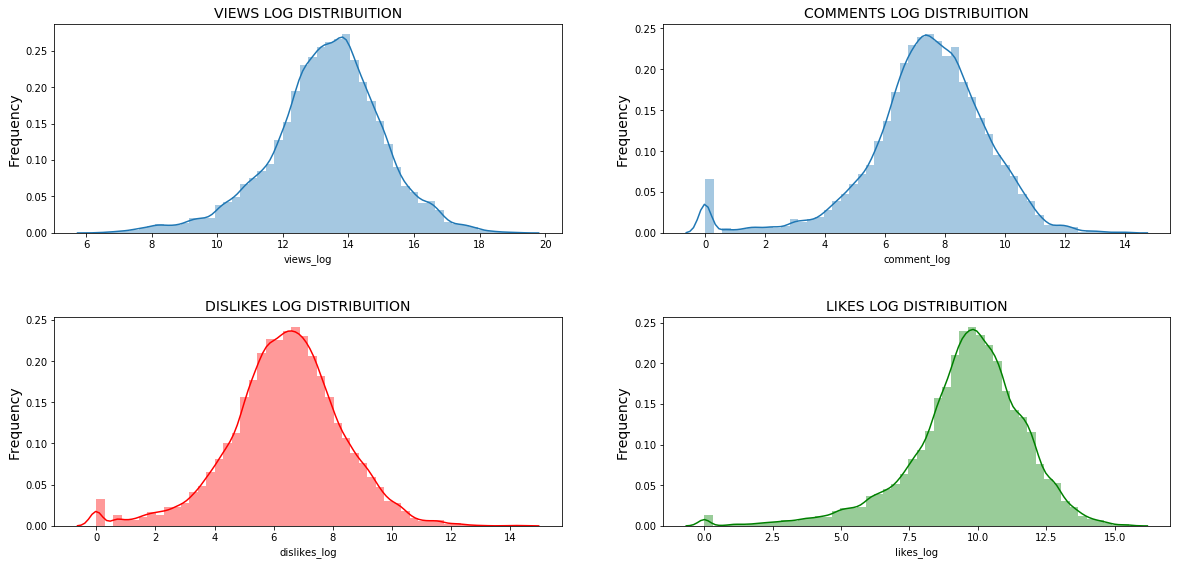

In [27]:
#Check distrubtion for (likes, dislikes, views)
plt.figure(figsize = (20,9))
#check for view_log
plt.subplot(2,2,1)
g1 = sb.distplot(df_clean['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#check for likes_log
plt.subplot(2,2,4)
g2 = sb.distplot(df_clean['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#check for dislikes_log
plt.subplot(2,2,3)
g3 = sb.distplot(df_clean['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#check for comment_log
plt.subplot(2,2,2)
g4 = sb.distplot(df_clean['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


### Were there any unusual points? Did you need to perform any transformations?
- X axis is log scale for the variables.
- the four variables are normally distrubted
---------------------------------

What is the common category ? 

Text(0, 0.5, 'Count')

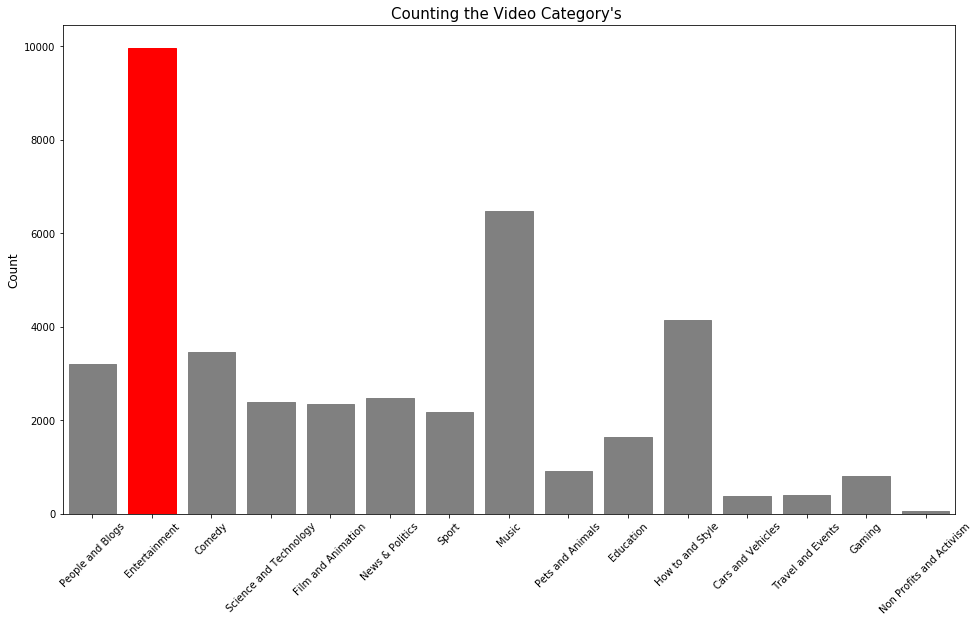

In [24]:
# Barplot to count the number of each category in category names
plt.figure(figsize = (16,9))
ax = sb.countplot(x="category_name", data=df,  orient ='H')
for bar in ax.patches:
    if bar.get_height() > 8000:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Counting the Video Category's ", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=12)

- The most common category is entertainment 
- Non Profits and Activism is very rare
----------------------------------------

What is the most common name for channels? 

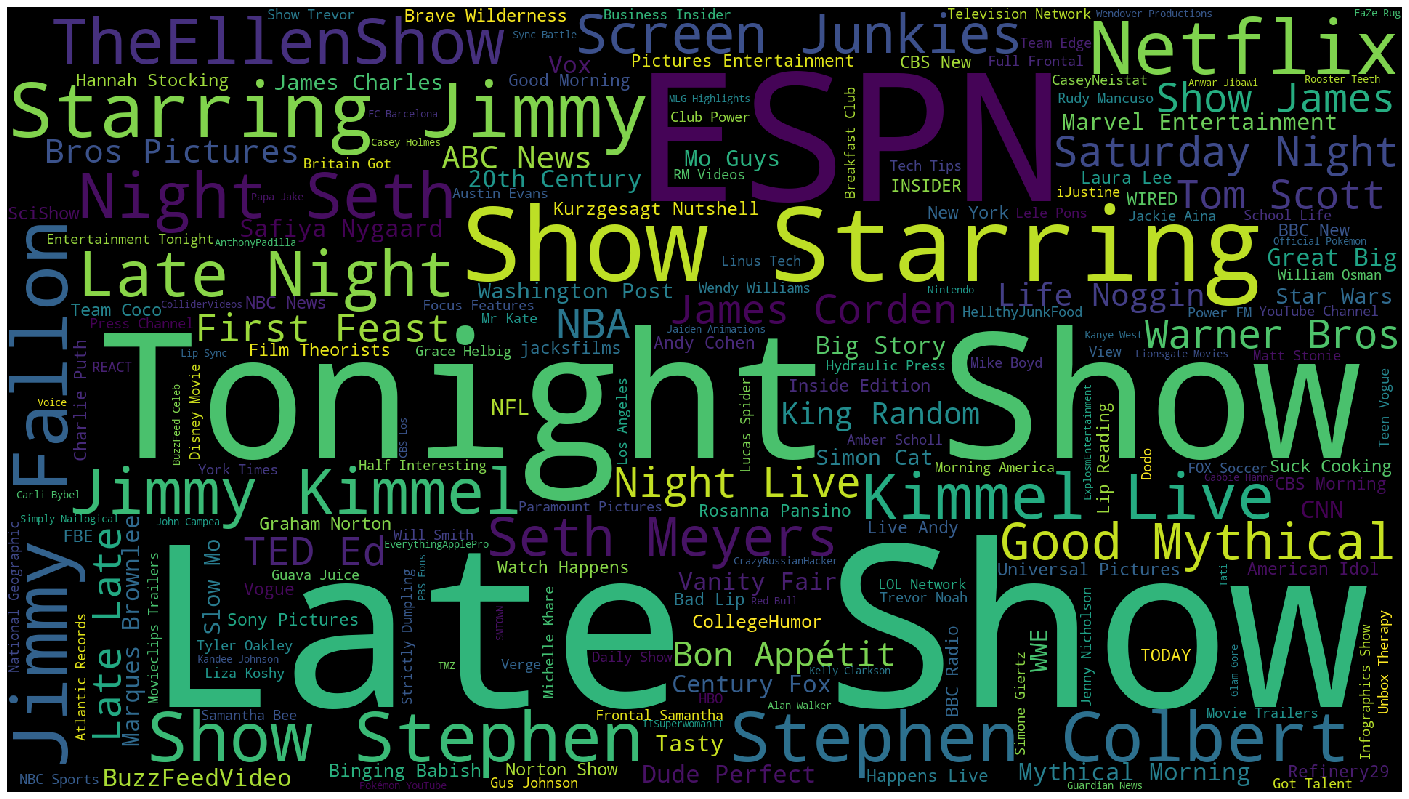

In [31]:
# Work cloud to detect the most common words in channel names

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.channel_title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

The most common words for channels names in US are

- Late show
- ESPN -Show Starting
- Netflix 
- Stephen Colbert 
- Starring Jimmy


## Bivariate Exploration


What are the correlation between the following variables?
- likes
- dislikes
- views 
- comment count

In [28]:
# Finding the correlation between numarical variables
df.corr(method='pearson')

,Unnamed: 0,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled
Unnamed: 0,1.000000,-0.020884,0.174760,0.150828,0.038505,0.086310,-0.015650,-0.030474
category_id,-0.020884,1.000000,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506
views,0.174760,-0.168231,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355
likes,0.150828,-0.173921,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888
dislikes,0.038505,-0.033547,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230
comment_count,0.086310,-0.076307,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819
comments_disabled,-0.015650,0.048949,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230
ratings_disabled,-0.030474,-0.013506,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000


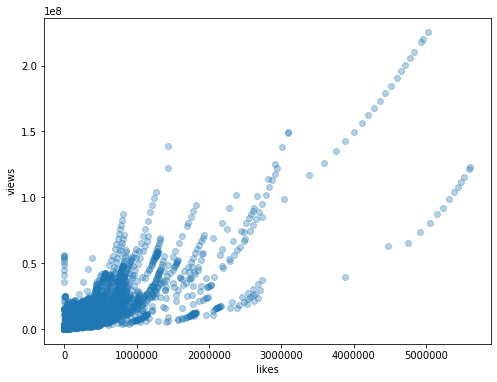

In [39]:
# positive relation between likes and veiws
plt.figure(figsize = (8,6))
sb.regplot(data = df, x = 'likes', y = 'views', fit_reg = False, scatter_kws = {'alpha' : 1/3})

# Most of the likes ranges from 0 to 1 million

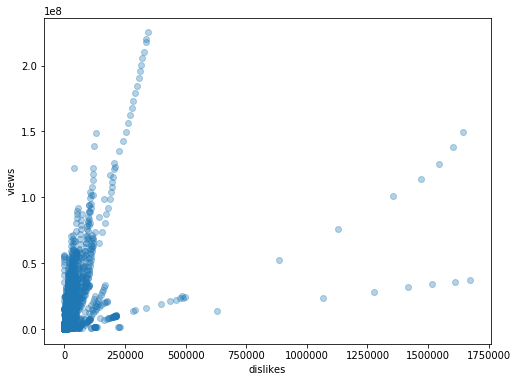

In [38]:
# positive relation between dislike and veiws
plt.figure(figsize = (8,6))
sb.regplot(data = df, x = 'dislikes', y = 'views', fit_reg = False, scatter_kws = {'alpha' : 1/3})

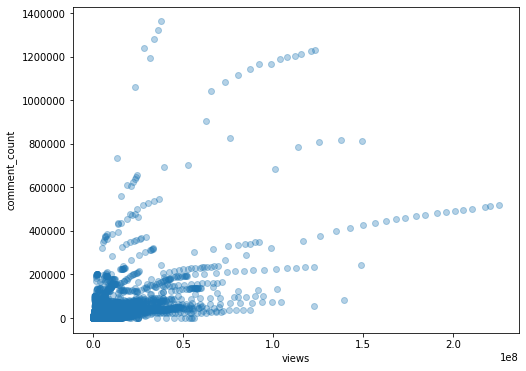

In [40]:
#Positive corelation between views and comment count
plt.figure(figsize = (8,6))
sb.regplot(data = df, x = 'views', y = 'comment_count', fit_reg = False, scatter_kws = {'alpha' : 1/3})

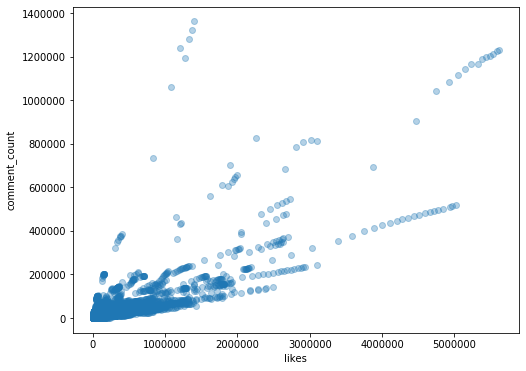

In [36]:
#Positive corelation between likes and comment count
plt.figure(figsize = (8,6))
sb.regplot(data = df, x = 'likes', y = 'comment_count', fit_reg = False, scatter_kws = {'alpha' : 1/3})

- Strong correlation between the number of views and the increase of dislike for each videos 

- Strong positive correlation between the number of comments and views

- strong positive correlation between likes and comment_count
---------------------

Box plot for likes, views, dislike, comment_count (with log vaules)

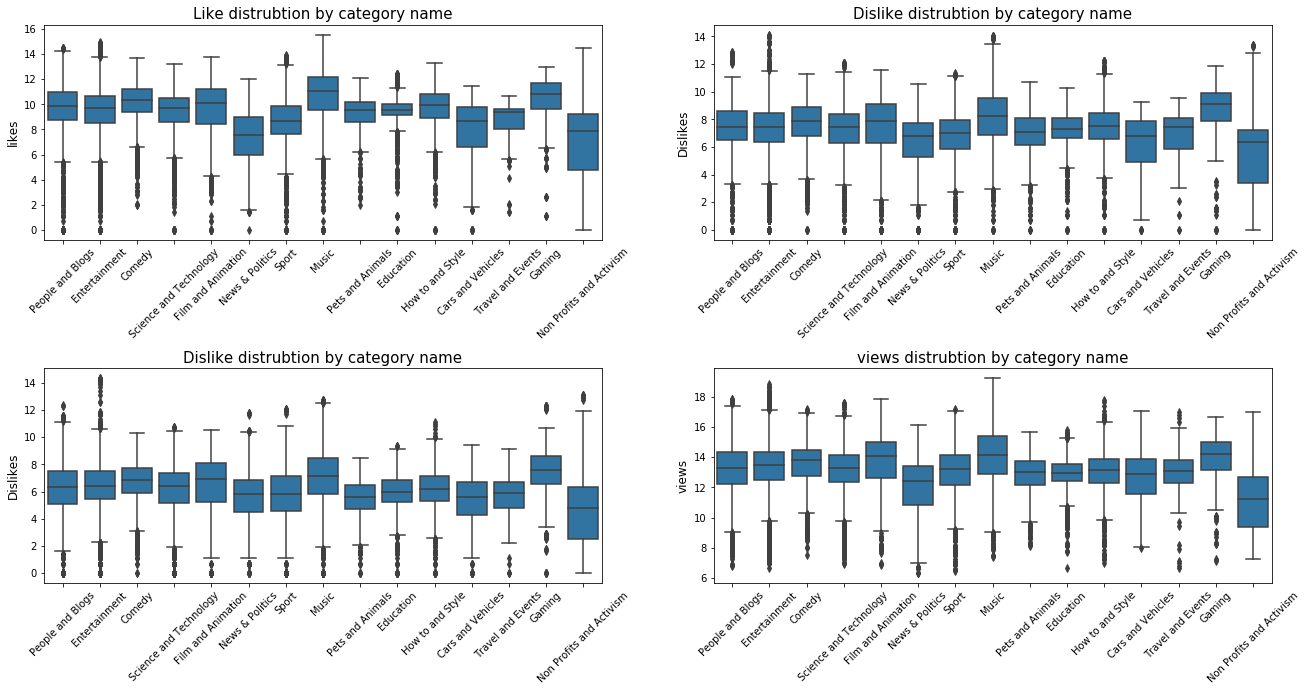

In [56]:
#Box plot for likes, views, dislike, comment_count (with log vaules)
base_color = sb.color_palette()[0]

plt.figure(figsize = (22,10))
plt.subplot(2,2,1)
ax = sb.boxplot(data = df_clean, x= 'category_name', y = 'likes_log', color = base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Like distrubtion by category name", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("likes", fontsize=12)

plt.subplot(2,2,4)
ax = sb.boxplot(data = df_clean, x= 'category_name', y = 'views_log', color = base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("views distrubtion by category name", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("views", fontsize=12)

plt.subplot(2,2,3)
ax = sb.boxplot(data = df_clean, x= 'category_name', y = 'dislikes_log', color = base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Dislike distrubtion by category name", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Dislikes", fontsize=12);


plt.subplot(2,2,2)
ax = sb.boxplot(data = df_clean, x= 'category_name', y = 'comment_log', color = base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Dislike distrubtion by category name", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Dislikes", fontsize=12);

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)




observation on box plot
- There are a lot of outliers in all of them.
- 

Fining the most popular 12 channels in the data set

In [30]:
#Creating dataframe with highest channels views
Best_twl = df[['channel_title', 'views']]
Best_twl = Best_twl.groupby('channel_title')['views'].sum()
Best_twl = pd.DataFrame(Best_twl)
Best_twl = Best_twl.sort_values('views', ascending=False)
Best_twl = Best_twl[:12]
Best_twl= Best_twl.reset_index()
Best_twl.head()

,channel_title,views
0,ChildishGambinoVEVO,3758488765
1,ibighit,2235906679
2,Dude Perfect,1870085178
3,Marvel Entertainment,1808998971
4,ArianaGrandeVevo,1576959172


Text(0.5, 1.0, 'The most popular channel')

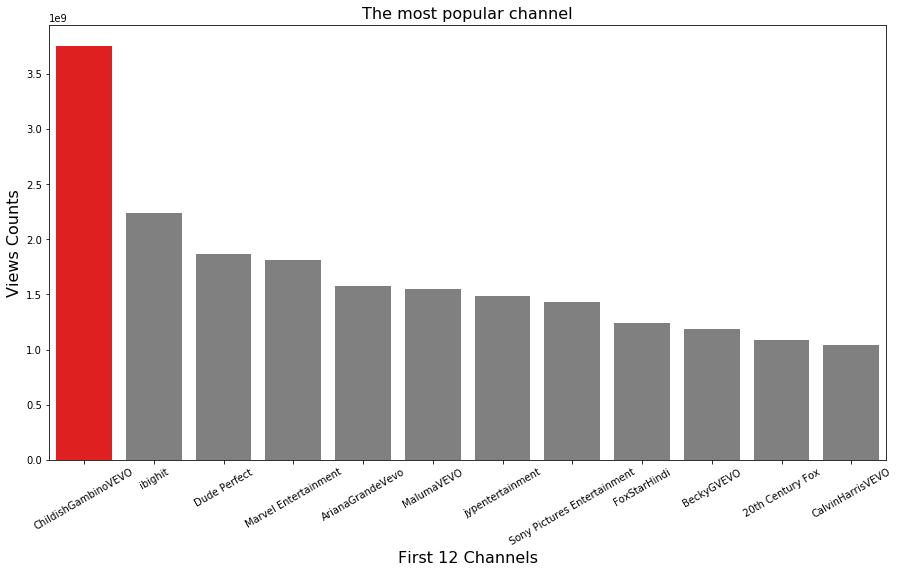

In [31]:
# plotting the views for the highest 12 channels
plt.figure(figsize=(15, 8))
c = ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
ax = sb.barplot(data = Best_twl, x = 'channel_title', y ='views', palette =c)
ax.set_xticklabels(labels= Best_twl.channel_title, fontsize=10, rotation=30)
ax.set_xlabel(xlabel='First 12 Channels', fontsize=16)
ax.set_ylabel(ylabel='Views Counts', fontsize=16)
ax.set_title('The most popular channel', fontsize=16)

## Multivariate Exploration

What are the correlation between the following variables (ALL) ?
- likes
- dislikes
- views 
- comment count

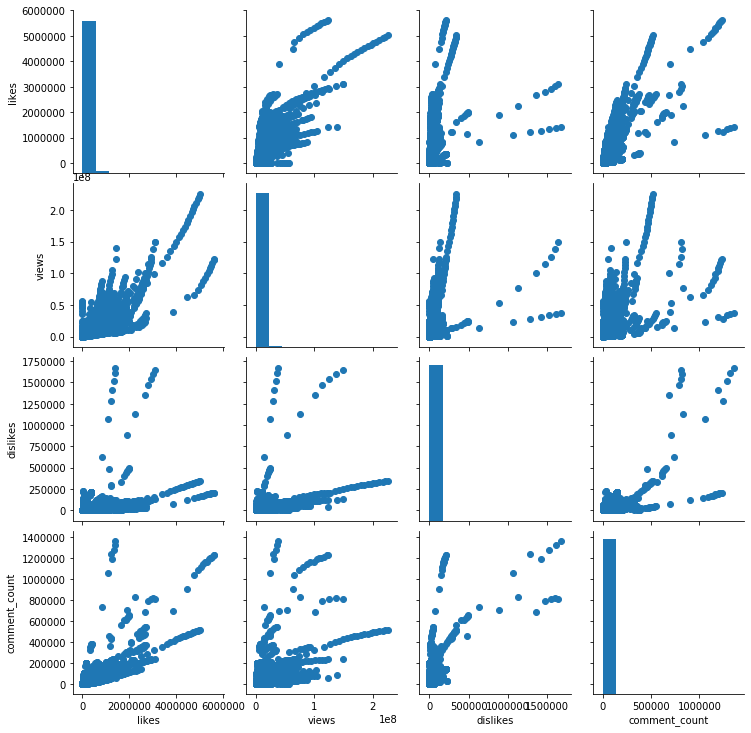

In [32]:
# Create a map for correlation
g = sb.PairGrid(data = df, vars = ['likes', 'views', 'dislikes', 'comment_count'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

## Find the p-value to measure the correlation between numaric variables

What is the correlation between (likes, dislikes, views, comment_count) ? 

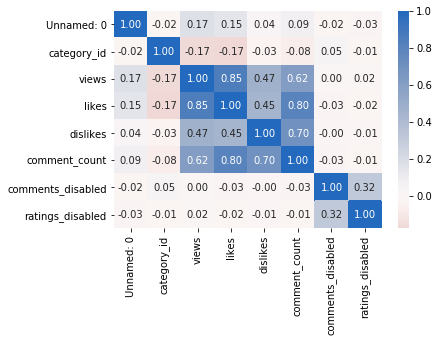

In [46]:
#create heatmap for correlation
sb.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)